In [15]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_cw_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [16]:
data

['t_n55          8.5648 ( 7.8618,  9.5016) ( 7.8126,  9.4418)  1.6291 (Jnode 106)\n',
 't_n56          8.4546 ( 7.7596,  9.3687) ( 7.7107,  9.3053)  1.5946 (Jnode 105)\n',
 't_n57          8.0684 ( 7.4186,  8.9158) ( 7.3803,  8.8627)  1.4825 (Jnode 104)\n',
 't_n58          7.1258 ( 6.5663,  7.8210) ( 6.5214,  7.7639)  1.2425 (Jnode 103)\n',
 't_n59          6.9408 ( 6.3991,  7.6116) ( 6.3688,  7.5668)  1.1981 (Jnode 102)\n',
 't_n60          6.6838 ( 6.1628,  7.3284) ( 6.1180,  7.2641)  1.1461 (Jnode 101)\n',
 't_n61          6.2986 ( 5.7962,  6.9094) ( 5.7720,  6.8697)  1.0977 (Jnode 100)\n',
 't_n62          3.2186 ( 1.8695,  4.2281) ( 1.9202,  4.2672)  2.3470 (Jnode 99)\n',
 't_n63          4.7947 ( 4.4024,  5.2956) ( 4.3712,  5.2442)  0.8731 (Jnode 98)\n',
 't_n64          3.6340 ( 2.9753,  4.2125) ( 2.9890,  4.2234)  1.2343 (Jnode 97)\n',
 't_n65          3.2353 ( 2.5659,  3.8450) ( 2.6068,  3.8810)  1.2742 (Jnode 96)\n',
 't_n66          2.5213 ( 1.9094,  3.1351) ( 1.9318,  3.15

In [17]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [18]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [19]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [20]:
posterior_mean_iqtree

[8.5648,
 8.4546,
 8.0684,
 7.1258,
 6.9408,
 6.6838,
 6.2986,
 3.2186,
 4.7947,
 3.634,
 3.2353,
 2.5213,
 1.6984,
 1.1246,
 0.4847,
 3.6858,
 6.8021,
 6.6277,
 6.2549,
 4.5883,
 4.1408,
 3.8998,
 6.6139,
 6.3448,
 6.1613,
 5.8141,
 5.388,
 5.2555,
 4.6243,
 4.2368,
 3.9,
 2.9129,
 2.6908,
 4.6733,
 3.8695,
 6.5049,
 1.3425,
 6.3761,
 6.0114,
 5.4098,
 5.0624,
 3.8606,
 4.2981,
 5.2261,
 5.0572,
 4.7427,
 3.6416,
 4.5212,
 7.4328,
 5.7853,
 3.8499,
 3.0694,
 5.671]

In [21]:
lower_ci_iqtree

[]

In [22]:
upper_ci_iqtree

[]

In [23]:
file_LG = open("LG_cw_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [25]:
posterior_mean_baseml

[9.7961,
 9.6898,
 8.8847,
 7.8113,
 7.4618,
 7.0313,
 6.4165,
 3.6211,
 4.8544,
 3.6105,
 3.0675,
 2.3111,
 1.5274,
 1.0068,
 0.4324,
 3.6563,
 7.0872,
 5.9005,
 6.3677,
 4.7025,
 4.0297,
 4.0076,
 7.126,
 6.6824,
 6.3702,
 5.9771,
 5.4847,
 5.2257,
 4.5336,
 4.0545,
 3.5977,
 2.7009,
 2.2965,
 4.6952,
 3.7754,
 6.9014,
 1.8724,
 6.6507,
 6.1497,
 5.4221,
 4.9203,
 3.7321,
 3.9266,
 5.2615,
 4.8356,
 4.1361,
 3.7283,
 4.5148,
 8.0156,
 6.2312,
 4.0489,
 3.9098,
 7.1152]

In [26]:
posterior_mean_iqtree

[8.5648,
 8.4546,
 8.0684,
 7.1258,
 6.9408,
 6.6838,
 6.2986,
 3.2186,
 4.7947,
 3.634,
 3.2353,
 2.5213,
 1.6984,
 1.1246,
 0.4847,
 3.6858,
 6.8021,
 6.6277,
 6.2549,
 4.5883,
 4.1408,
 3.8998,
 6.6139,
 6.3448,
 6.1613,
 5.8141,
 5.388,
 5.2555,
 4.6243,
 4.2368,
 3.9,
 2.9129,
 2.6908,
 4.6733,
 3.8695,
 6.5049,
 1.3425,
 6.3761,
 6.0114,
 5.4098,
 5.0624,
 3.8606,
 4.2981,
 5.2261,
 5.0572,
 4.7427,
 3.6416,
 4.5212,
 7.4328,
 5.7853,
 3.8499,
 3.0694,
 5.671]

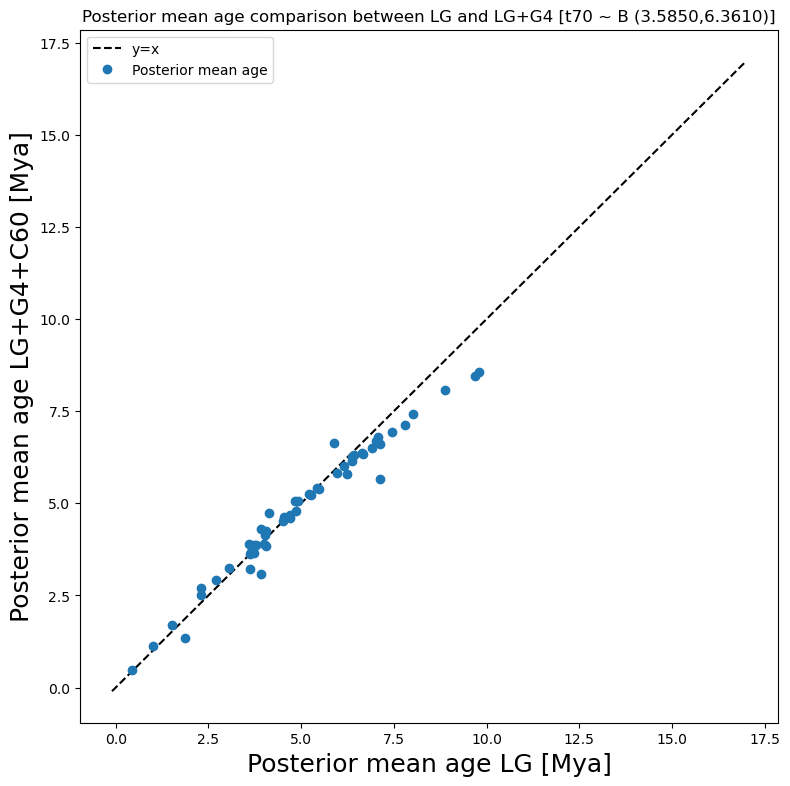

In [27]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C60 [Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [t70 ~ B (3.5850,6.3610)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C60_cw_scatter.png')

In [28]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')